In [107]:
import numpy as np
import sys
import gzip
import matplotlib.pyplot as plt

In [119]:
size = 100
def SwapInDirection(grid, x, y, dir):
    # print(x + " " + y + " " + dir)
    if dir == 1:
        store = grid[x][y]
        grid[x][y] = grid[x+1][y]
        grid[x+1][y] = store
    else:
        store = grid[x][y]
        grid[x][y] = grid[x][y+1]
        grid[x][y+1] = store
storeSweeps = []
def RunAutomata(grid, sweeps):
    recordSweeps=[0,100,200,400,800,1600,3200,4800,6400,8000]
    for i in range(0, sweeps):
        x = np.random.randint(0, size-1, size**2)
        y = np.random.randint(0, size-1, size**2)
        dirs = np.random.randint(0, 2, size**2)
        if i in recordSweeps:
            plt.rcParams['image.cmap'] = 'binary'
            fig, ax = plt.subplots(figsize=(9, 9))
            ax.matshow(grid)
            storeSweeps.append(np.copy(grid))
        for j in range(0, size**2):
            SwapInDirection(grid, x[j], y[j], dirs[j])
        

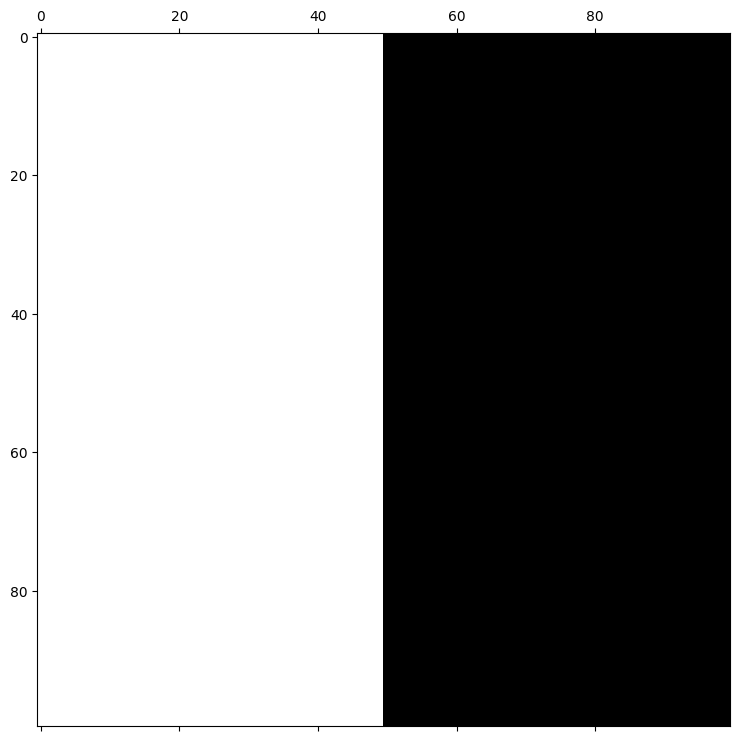

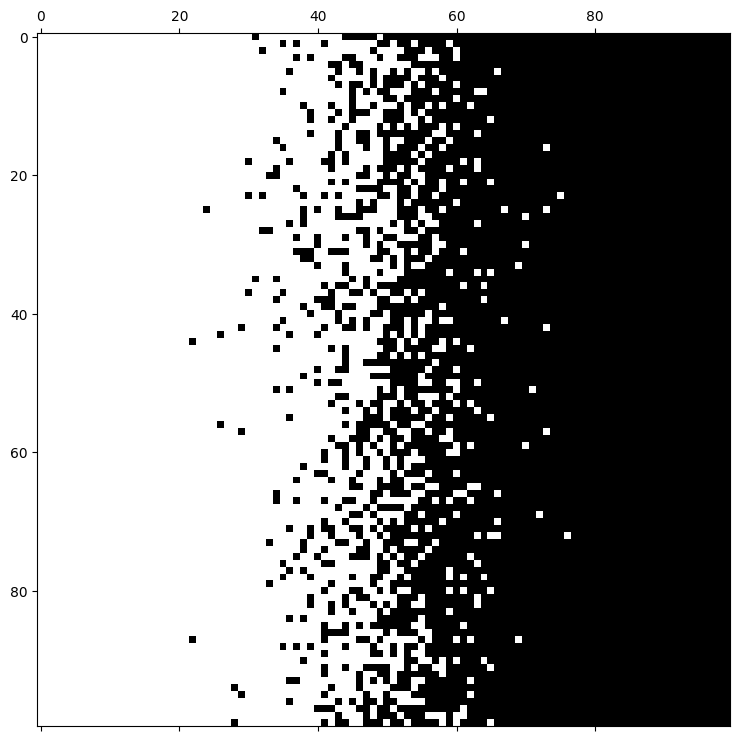

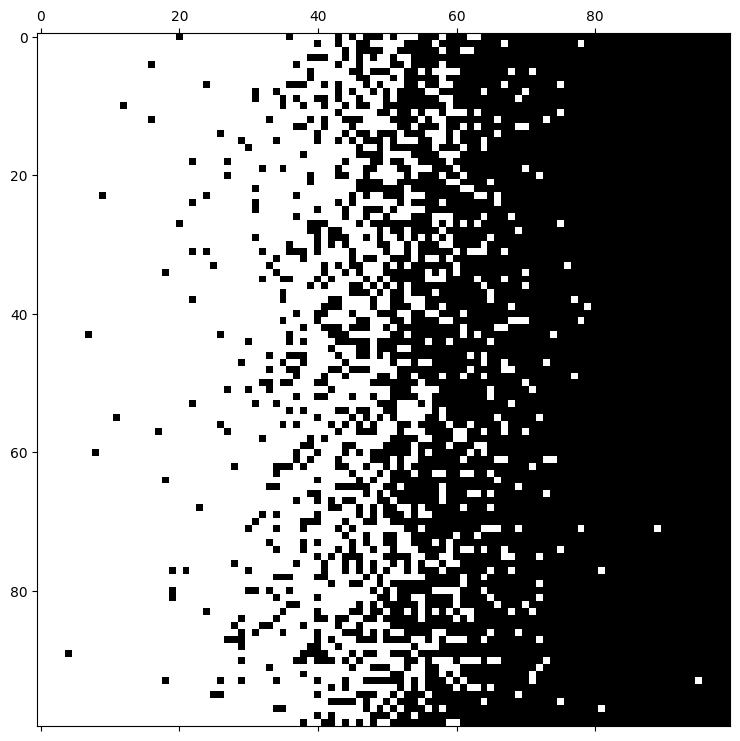

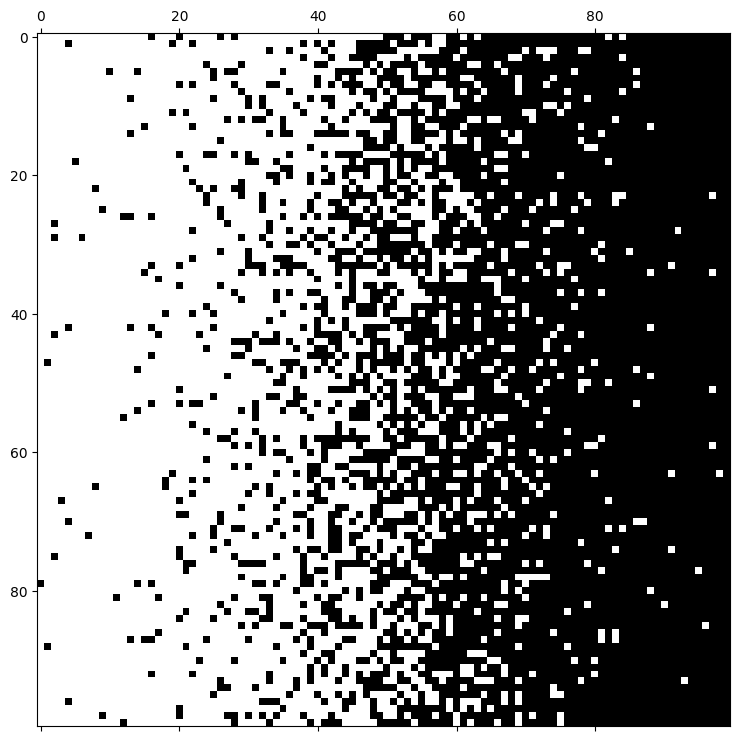

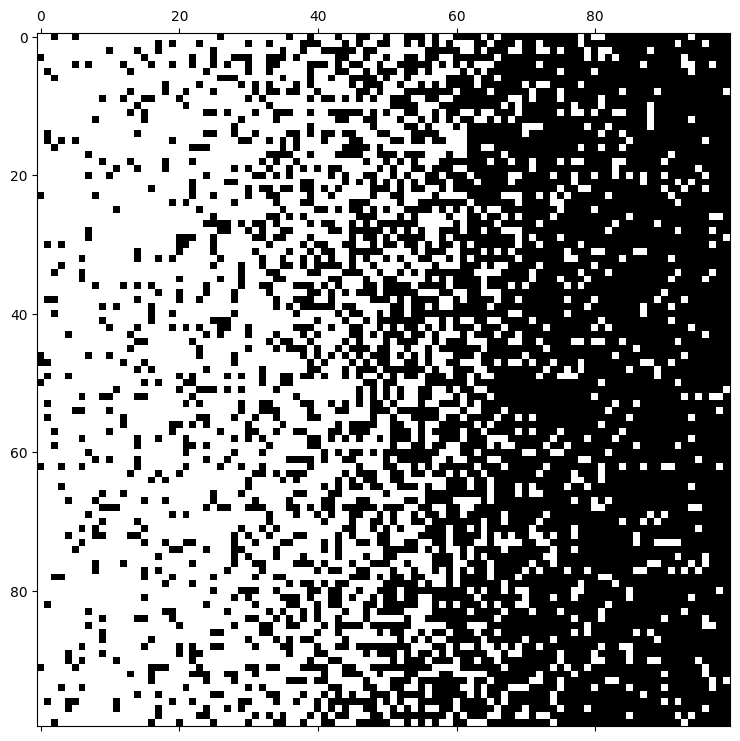

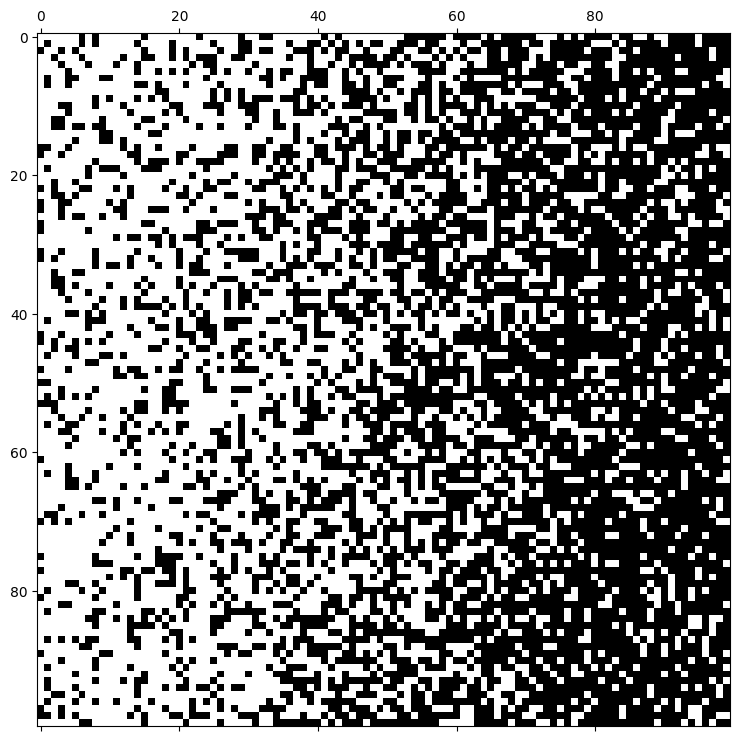

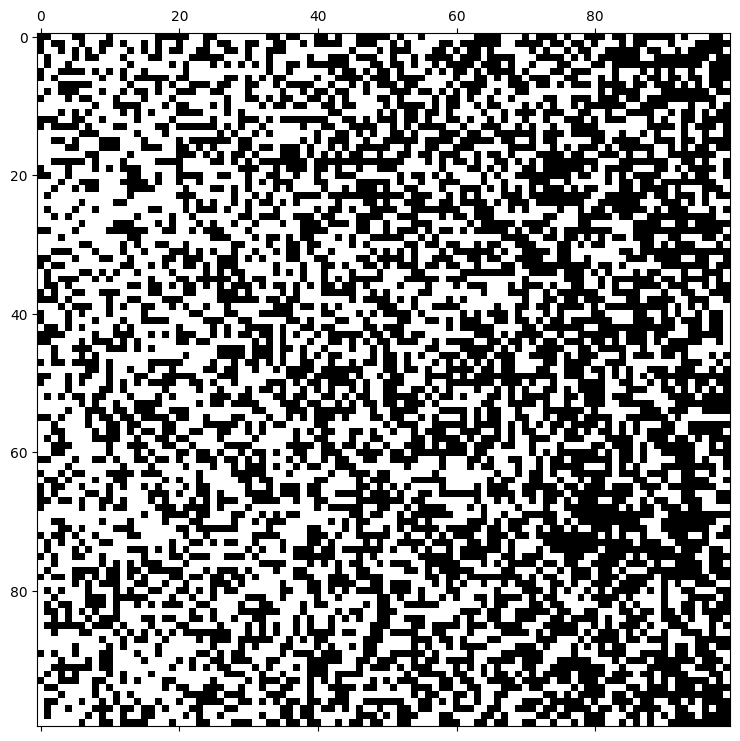

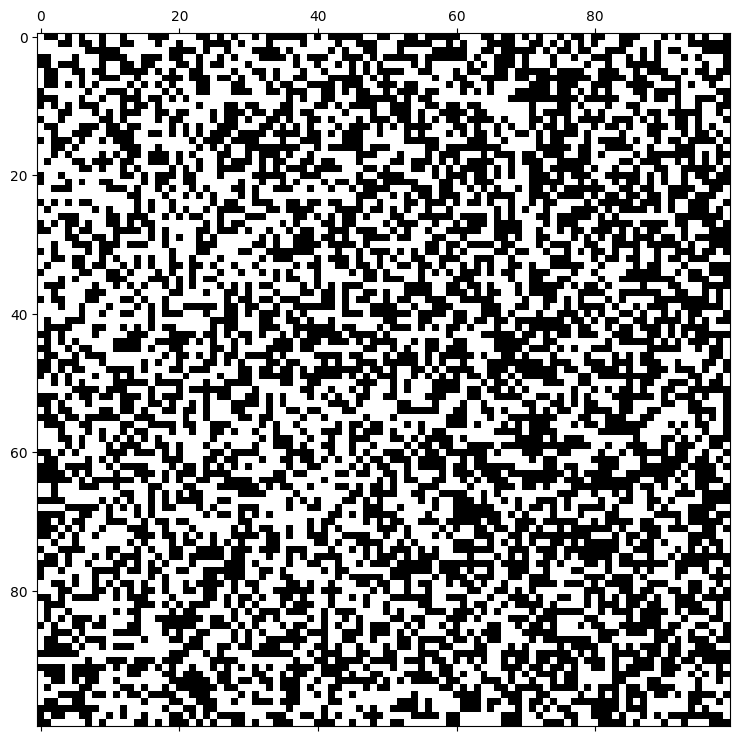

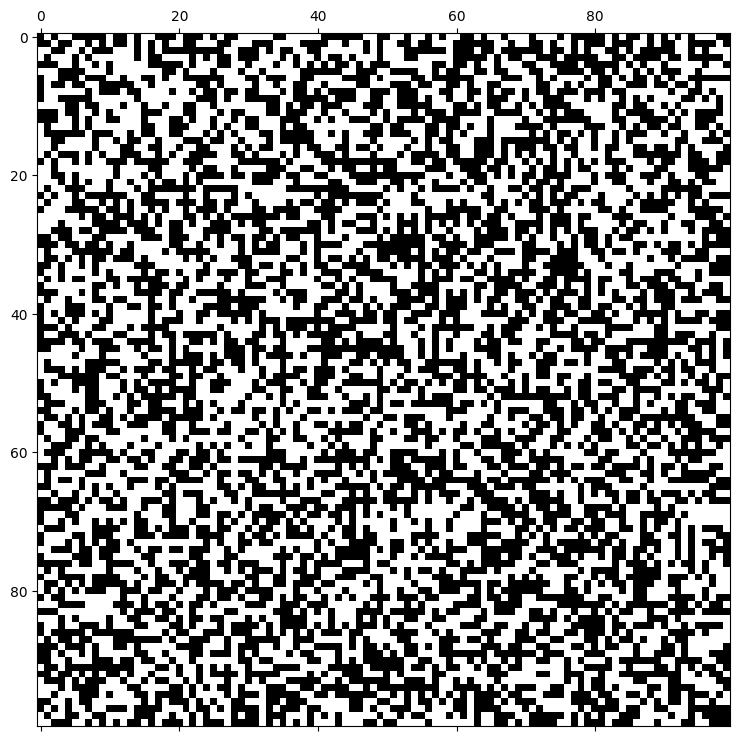

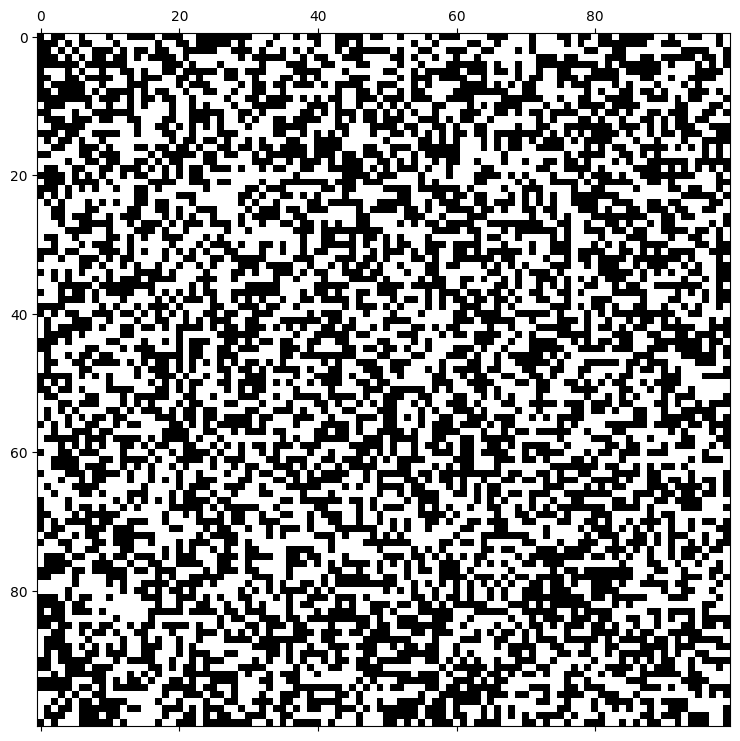

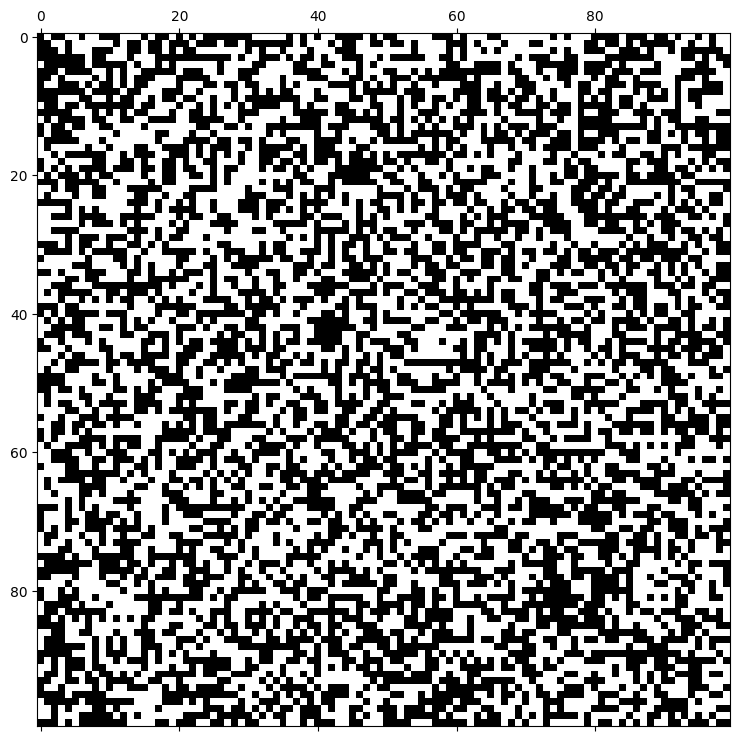

In [120]:

state = np.zeros((size, size))
# state[0:(int)(size/2)] = 1
state[0:size, (int)(size/2):size] = 1
RunAutomata(state, 8001)
plt.rcParams['image.cmap'] = 'binary'
fig, ax = plt.subplots(figsize=(9, 9))
ax.matshow(state)
# ax.axis(False)

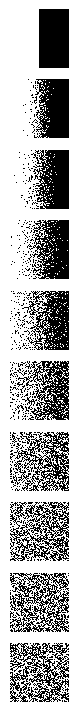

In [121]:
fig, ax = plt.subplots(10, figsize=(9, 9))
for i in range(len(ax)):
    ax[i].matshow(storeSweeps[i])
    ax[i].axis(False)

In [122]:
ent = []
for i in storeSweeps:
    ent.append(sys.getsizeof(gzip.compress(i.tobytes())))

In [123]:
print(ent)

[380, 1144, 1375, 1764, 2146, 2411, 2481, 2468, 2480, 2499]


Text(0, 0.5, 'Compressed size (entropy)')

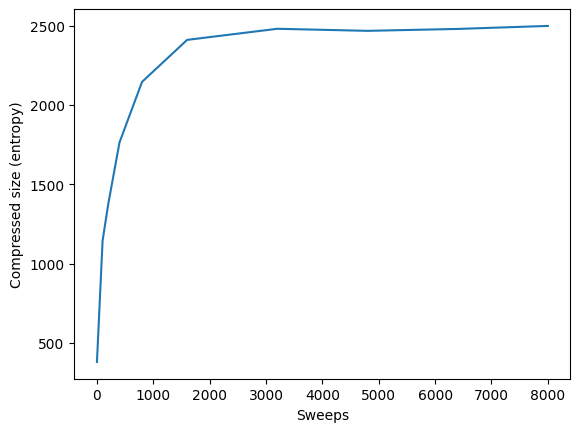

In [134]:
recordSweeps=[0,100,200,400,800,1600,3200,4800,6400,8000]
plt.plot(recordSweeps, ent)
plt.xlabel("Sweeps")
plt.ylabel("Compressed size (entropy)")